# Курсовая работа
## Выполнил: Баранов А. В. ПИ19-3
### Тема: Машинное обучение в задачах сжатия информации
---

# Импорт библиотек

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go


In [82]:
# plt.style.use("seaborn")

## Подключение dataset`а

In [2]:
# mnist_784 датасет, которые содержит 70_000 строк данных о рукописных цифрах (0-9), и 784 атрибута,
# каждый из которых соотвествует пикселю (28x28)
mnist = fetch_openml('mnist_784')

Параметры | Значения
--- | ---
Кол-во классов | 10 (цифры от 0 до 9)
Данных на каждый класс | ~7000
Строк данных | 70000
Компонентов | 784
Каждый элемент компонента | целое число от 0 до 255

In [83]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [109]:
mnist.url

'https://www.openml.org/d/554'

In [115]:
print("Dataset id:", mnist.details["id"])

Dataset id: 554


In [110]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [84]:
mnist_data = mnist.data.to_numpy()
mnist_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Количество картинок и атрибутов

In [85]:
mnist.data.shape

(70000, 784)

## Количество данных категорий

In [86]:
mnist.target.shape

(70000,)

## Категории (Цифры от 0 до 9)

In [87]:
mnist.target[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [88]:
mnist.DESCR # Информация об авторе датасета и описание датасета

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [89]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Пример картинки из датасета

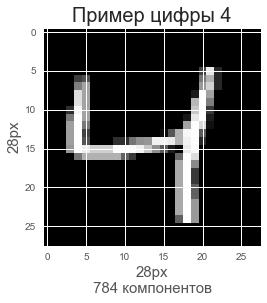

In [90]:
plt.figure(figsize=(4, 4))
plt.imshow(mnist_data[2].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))

plt.ylabel('28px', fontsize=15)
plt.xlabel('28px\n784 компонентов', fontsize=15)
plt.title('Пример цифры 4', fontsize=20)
plt.show()


## Так выглядит массив цифры `4` 

In [91]:
print("Цифра:", mnist.target[2])
print("---"*30)
print(mnist.data.iloc[[2]].values)

Цифра: 4
------------------------------------------------------------------------------------------
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.  67. 232.  39.   0.   0.   0.   0.   0.
    0.   0.   0.   0.  62.  81.   0.

## Разделение на обучающую и тестовую выборки

In [92]:
train_img, test_img, train_label, test_label = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)


## Стандартизация данных

$z = \frac{(x - u)}{s}$

где `x` - выборка, `u` - среднее значение обучающих выборок,    
`s` - стандартное отклонение обучающих выборок

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# применяем стандартизацию для обучающего набора
scaler.fit(train_img)


train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## Ковариационная матрица

In [94]:
cov_matrix = np.matmul(train_img.T, train_img)
cov_matrix.shape

(784, 784)

## Метод главных компонент (PCA)

In [95]:
# Создаем объект модели метода главных компонент
pca = PCA(.95)

In [ ]:
# уменьшаем данные согласно модели
lower_dimensional_data = pca.fit_transform(mnist.data)

In [ ]:
lower_dimensional_data.shape

(70000, 154)

## Количество необходимых компонентов

In [ ]:
print(f"При дисперсии = {pca.n_components}, необходимо: {pca.n_components_} компонента")

При дисперсии = 0.95, необходимо: 154 компонента


In [ ]:
# получаем точки, но уже с потерей информации
mnist_lower = pca.inverse_transform(lower_dimensional_data)

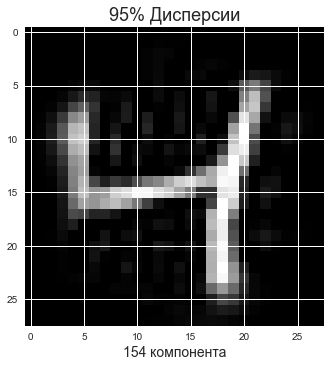

In [ ]:
plt.imshow(mnist_lower[2].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('154 компонента', fontsize=14)
plt.title('95% Дисперсии', fontsize=18)
plt.show()


## Сравнение оригинала и 154 компонента

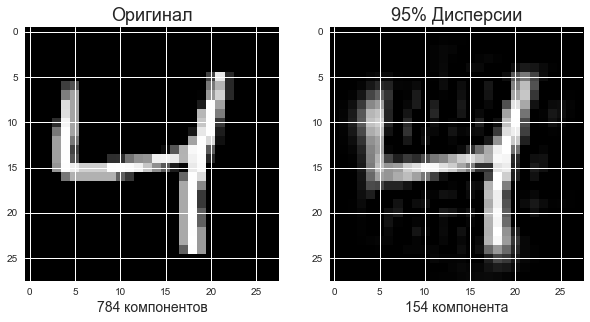

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mnist_data[2].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('784 компонентов', fontsize=14)
plt.title('Оригинал', fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(mnist_lower[2].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('154 компонента', fontsize=14)
plt.title('95% Дисперсии', fontsize=18)
plt.show()


Для построения графика зависимости изменения дисперсии от количества основых компонентов необходимо произвести несколько вычислений

In [ ]:
# Создаем новую модель PCA для 784 компонентов, чтобы посчитать сумму всех дисперсий
pca = PCA()
pca.fit(mnist.data)
pca.n_components_

784

считаем сумму всех дисперсий

In [ ]:
total = sum(pca.explained_variance_)
total

3430023.44807948

Находим % от большего к меньшему

In [ ]:
var_exp = [(i/total)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.746115922494758, 7.15544458687871, 6.149530980723016, 5.403384528548192, 4.888933703877883]


Считаем совокупную (куммулятивную) дисперсию

In [ ]:
cum_var_exp = np.cumsum(var_exp) 
cum_var_exp

array([  9.74611592,  16.90156051,  23.05109149,  28.45447602,
        33.34340972,  37.64863675,  40.92689828,  43.81653984,
        46.57490404,  48.91704421,  51.02373276,  53.061286  ,
        54.76835031,  56.46237009,  58.04575233,  59.53209723,
        60.85145572,  62.13046998,  63.31774246,  64.47067917,
        65.53671895,  66.54651329,  67.50566452,  68.4152996 ,
        69.29858642,  70.13740462,  70.94723642,  71.73295432,
        72.47321655,  73.16323071,  73.8193747 ,  74.46484499,
        75.06566429,  75.65127604,  76.2180296 ,  76.76150026,
        77.26621733,  77.75329675,  78.23225188,  78.69984553,
        79.15421416,  79.59913217,  80.01734877,  80.41351268,
        80.79722042,  81.17300523,  81.53443151,  81.88345611,
        82.22218771,  82.54188388,  82.85873791,  83.16888282,
        83.46536318,  83.75246462,  84.03497842,  84.30440113,
        84.57279344,  84.82930277,  85.08247063,  85.32711866,
        85.56682089,  85.8054019 ,  86.03463564,  86.25

## График зависимости изменения дисперсии от количества основых компонентов

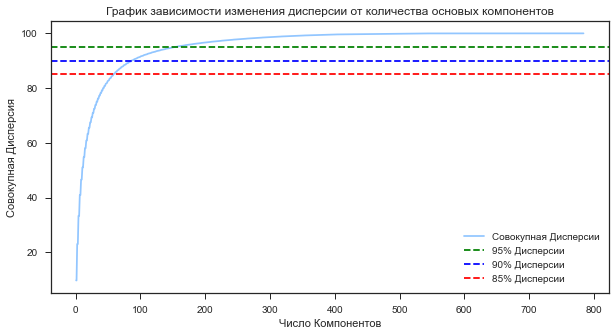

In [107]:
plt.figure(figsize=(10, 5))
plt.title('График зависимости изменения дисперсии от количества основых компонентов')
plt.step(range(1, 785), cum_var_exp, where='mid',label='Совокупная Дисперсии')
plt.xlabel('Число Компонентов')
plt.ylabel('Совокупная Дисперсия')
plt.axhline(y = 95, color='g', linestyle='--', label = '95% Дисперсии')
plt.axhline(y = 90, color='b', linestyle='--', label = '90% Дисперсии')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Дисперсии')
plt.legend(loc='best')
plt.show()

## Количество компонентов необходимых при соотвествующих дисперсих

In [ ]:
# список из значений дисперсий
variance_list = [99, 95, 90, 85, 80, 50]
variance_d = {}

for variance in variance_list:
    variance_d["var_"+str(variance)] = np.argmax(cum_var_exp > variance) + 1

variance_d


{'var_99': 331,
 'var_95': 154,
 'var_90': 87,
 'var_85': 59,
 'var_80': 43,
 'var_50': 11}

In [ ]:
def to_PCA_data(perc, data):
    """Принимает % дисперсии и набор данных, создаем новые точки на основе PCA метода"""
    pca = PCA(perc)
    return pca.inverse_transform(pca.fit_transform(data))

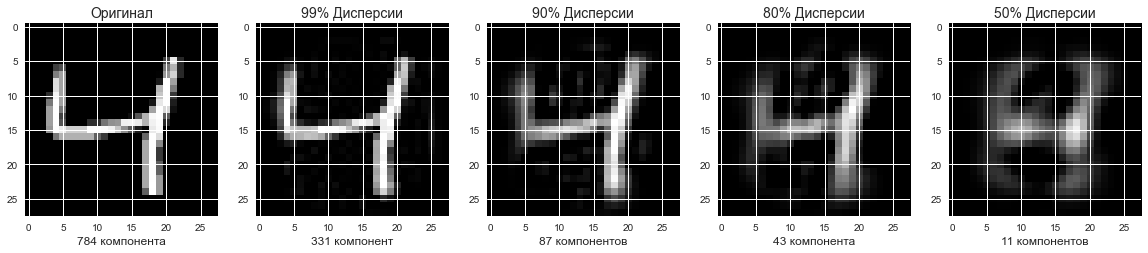

In [ ]:
plt.figure(figsize=(20, 4))
idx = 2

plt.subplot(1, 5, 1)
plt.imshow(mnist_data[idx].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('784 компонента', fontsize=12)
plt.title('Оригинал', fontsize=14)

plt.subplot(1, 5, 2)
plt.imshow(to_PCA_data(.99, mnist_data)[idx].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('331 компонент', fontsize=12)
plt.title('99% Дисперсии', fontsize=14)

plt.subplot(1, 5, 3)
plt.imshow(to_PCA_data(.9, mnist_data)[idx].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('87 компонентов', fontsize=12)
plt.title('90% Дисперсии', fontsize=14)

plt.subplot(1, 5, 4)
plt.imshow(to_PCA_data(.80, mnist_data)[idx].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('43 компонента', fontsize=12)
plt.title('80% Дисперсии', fontsize=14)

plt.subplot(1, 5, 5)
plt.imshow(to_PCA_data(.5, mnist_data)[idx].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255))
plt.xlabel('11 компонентов', fontsize=12)
plt.title('50% Дисперсии', fontsize=14)
plt.show()

## Визуализация метода главных компонент

In [ ]:
# Для визуализации уменьшим объем наших данных до 5_000
Target = mnist.target[:5000].values.astype(int)
X = train_img[:5000]
pca = PCA(n_components=154)
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)
X_train = pca.transform(X_std)

In [ ]:
data = go.Scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    mode='markers',
    text=Target,
    showlegend=False,
    marker=dict(
        size=10,
        color=Target,
        colorscale='Jet',
        showscale=False,
        line=dict(
            width=3,
            color='rgb(255, 255, 255)'
        ),
        opacity=1
    )
)

layout = go.Layout(
    title='Метод главных компанент (PCA)',
    hovermode='closest',
    xaxis=dict(
        title='Первый Основной Компонент',
        gridwidth=4
    ),
    yaxis=dict(
        title='Второй Основной Компонент',
        gridwidth=4
    ),
    showlegend=True
)

fig = dict(data=data, layout=layout)
py.iplot(fig)


## Логистическая регрессия

In [ ]:

X_train, X_test, train_label, test_label = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
PCA_model = PCA(.9)
PCA_model.fit(X_train_std)

PCA(n_components=0.9)

In [ ]:
PCA_model.n_components_

234

In [ ]:
pca_X_train = pca.transform(X_train_std)
pca_X_test = pca.transform(X_test)

In [ ]:
model = LogisticRegression(solver = 'lbfgs', penalty="l2", C=1)
model.fit(pca_X_train, train_label)
y_pred = model.predict(pca_X_test)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
y_pred

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

## Матрица ошибок по 10 категориям

In [ ]:
print(confusion_matrix(test_label, y_pred))

[[ 970    0    2    3    1    7    8    0    5    0]
 [   0 1116    6    1    1    5    1    2    7    2]
 [   3   11  928   19   15    6   14   12   30    2]
 [   2    6   36  888    1   31    3   11   22   13]
 [   1    3    6    0  900    0   12    7    5   28]
 [   5    4    7   29    9  750   16    5   28   10]
 [   7    2    7    0   11   17  939    0    6    0]
 [   1    4   17    3   10    6    0  985    3   35]
 [   3   19   11   18    4   28    8    2  853   17]
 [   3    4    3   11   29   10    1   32    7  869]]


## Отчет по точности, recall и f1 score

In [ ]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.95      0.98      0.97      1141
           2       0.91      0.89      0.90      1040
           3       0.91      0.88      0.89      1013
           4       0.92      0.94      0.93       962
           5       0.87      0.87      0.87       863
           6       0.94      0.95      0.94       989
           7       0.93      0.93      0.93      1064
           8       0.88      0.89      0.88       963
           9       0.89      0.90      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print(f1_score(test_label, y_pred, average="weighted"))

0.919658542631246


## Таблица времени выполнения PCA


|Дисперсия | Кол-во компонентов | Время | Точность|
|---------|------|-----|-----|
|1 | 784 | 1m5s | 0.916|
|0.99 | 331 | 55.8s | 0.917|
|0.95 | 154 | 20.7s | 0.92|
|0.9 | 87 | 17.6s | 0.915|
|0.8 | 43 | 12.4s | 0.9 |